## TASK 01 
`DATA CLEANING:` There are still a lot of duplicates because many products appear in multiple categories. Revisit the pre-processing code so that each product appears only once in the df DataFrame, following these steps:

    - Reduce the Data Frame so that each row represents a unique product
    - Add a new column categories that contains a list of all categories that the product appears in.
    - Keep a item-price column with the original price of the item.


In [1]:
import os
import random
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Directory containing your CSV files
directory = 'waitrose/'

# List to hold all individual DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        # Append the DataFrame to the list
        dfs.append(df)

In [19]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

In [20]:
print(f"No of Rows : {len(merged_df)}\n")
merged_df.info()


No of Rows : 25418

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25418 entries, 0 to 25417
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data-product-id        25418 non-null  int64  
 1   data-product-name      25418 non-null  object 
 2   data-product-type      25418 non-null  object 
 3   data-product-on-offer  25418 non-null  bool   
 4   data-product-index     25408 non-null  float64
 5   image-url              25418 non-null  object 
 6   product-page           25418 non-null  object 
 7   product-name           25407 non-null  object 
 8   product-size           25363 non-null  object 
 9   item-price             25407 non-null  object 
 10  price-per-unit         24976 non-null  object 
 11  offer-description      7201 non-null   object 
 12  category               25418 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [21]:
# Drop duplicates based on all columns
Drop_df = merged_df.drop_duplicates()
print(f"No of Rows : {len(Drop_df)}\n")

No of Rows : 25378



In [22]:
Drop_df.isnull().sum()

data-product-id              0
data-product-name            0
data-product-type            0
data-product-on-offer        0
data-product-index          10
image-url                    0
product-page                 0
product-name                11
product-size                55
item-price                  11
price-per-unit             442
offer-description        18200
category                     0
dtype: int64

In [23]:
Drop_df = Drop_df.dropna(subset=['product-name', 'item-price','price-per-unit'])

# Fill missing values in 'product-size' with a placeholder
Drop_df['product-size'].fillna('Unknown', inplace=True)

# Optionally, drop the 'offer-description' column if it has too many missing values
Drop_df = Drop_df.drop(columns=['offer-description'])

# Check the missing values again
print(Drop_df.isnull().sum())


data-product-id          0
data-product-name        0
data-product-type        0
data-product-on-offer    0
data-product-index       0
image-url                0
product-page             0
product-name             0
product-size             0
item-price               0
price-per-unit           0
category                 0
dtype: int64


In [24]:
Drop_df.rename(columns={
    'data-product-id': 'product_id',
    'data-product-name': 'product_name',
    'data-product-type': 'product_type',
    'data-product-on-offer': 'product_on_offer',
    'data-product-index': 'product_index',
    'image-url': 'image_url',
    'product-page': 'product_page',
    'product-name': 'product_name_alt',
    'product-size': 'product_size',
    'item-price': 'item_price',
    'price-per-unit': 'price_per_unit',
    'offer-description': 'offer_description',
    'category': 'category'
}, inplace=True)

In [25]:
Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        24936 non-null  int64  
 1   product_name      24936 non-null  object 
 2   product_type      24936 non-null  object 
 3   product_on_offer  24936 non-null  bool   
 4   product_index     24936 non-null  float64
 5   image_url         24936 non-null  object 
 6   product_page      24936 non-null  object 
 7   product_name_alt  24936 non-null  object 
 8   product_size      24936 non-null  object 
 9   item_price        24936 non-null  object 
 10  price_per_unit    24936 non-null  object 
 11  category          24936 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 2.3+ MB


In [26]:
Renamed_df = Drop_df.dropna(subset=['product_index'])
Renamed_df['product_index'] = Renamed_df['product_index'].astype(int)

In [27]:
Renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        24936 non-null  int64 
 1   product_name      24936 non-null  object
 2   product_type      24936 non-null  object
 3   product_on_offer  24936 non-null  bool  
 4   product_index     24936 non-null  int64 
 5   image_url         24936 non-null  object
 6   product_page      24936 non-null  object
 7   product_name_alt  24936 non-null  object
 8   product_size      24936 non-null  object
 9   item_price        24936 non-null  object
 10  price_per_unit    24936 non-null  object
 11  category          24936 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 2.3+ MB


In [28]:
# Group by 'data-product-id' and aggregate 'category' into a list
grouped = Renamed_df.groupby('product_id')['category'].apply(list).reset_index()

# Merge the aggregated categories back to the original DataFrame
Drop_df = pd.merge(Drop_df, grouped, on='product_id', how='left')
Drop_df.head(1)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,category_x,category_y
0,850323,TENA Lady Pants Plus M,G,True,316.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"


In [29]:
# Rename the new column to 'categories'
Drop_df.rename(columns={'category_y': 'categories'}, inplace=True)
Drop_df.head(1)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,category_x,categories
0,850323,TENA Lady Pants Plus M,G,True,316.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"


## TASK 02 
`COMPARATIVE ANALYSIS:` From the plot in 📅 Week 01 – Day 04, we learned that the supermarket’s own brand (‘Everyday Value’) contains the cheapest products in the dataset. Your goal is to create at least 2 data visualizations with an analysis of how the products in this category compare to their equivalent branded ones in other categories within the dataset.

In [36]:
everyday_value_products = Drop_df[Drop_df['category_x'].str.contains('Everyday Value', case=False, na=False)]

In [46]:
product_name = everyday_value_products['product_name'].values 
product = []
for item in product_name:
	product.append(item)
print(len(product))

141


In [47]:
product_prices = everyday_value_products['item_price'].values 
prices_list = []
for item in product_prices:
	prices_list.append(item)
def clean_and_convert(price):
    if price.endswith('p'):
        return float(price.replace('p', '')) / 100
    elif price.startswith('£'):
        return float(price.replace('£', ''))
    else:
        return None 

prices = [clean_and_convert(price) for price in prices_list]

df = pd.DataFrame({'Original Price': prices_list, 'Cleaned Price': prices})
print(len(prices))

141


In [48]:
essential = []
branded = []
essential_prices = []
branded_prices = []

for idx, item in enumerate(product):
    if 'Essential' in item:
        essential.append(item)
        essential_prices.append(prices[idx])
    else:
        branded.append(item)
        branded_prices.append(prices[idx])

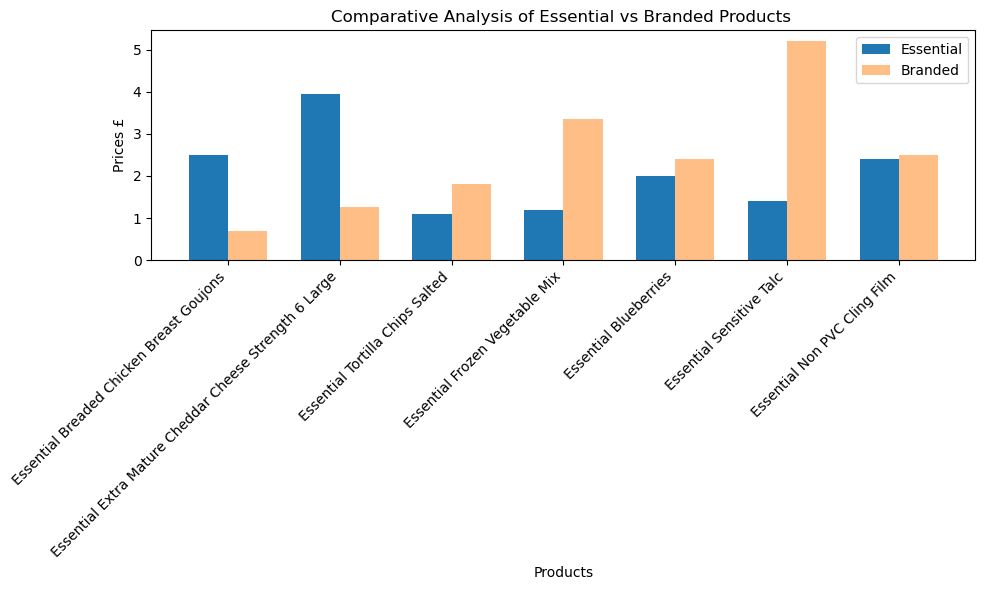

In [57]:
number_of_samples = 7

essential_samples = random.sample(essential, number_of_samples)
branded_samples = random.sample(branded, number_of_samples)


essential_prices_sampled = []
for product in essential_samples:
    index = essential.index(product)
    essential_prices_sampled.append(essential_prices[index])

branded_prices_sampled = []
for product in branded_samples:
    if product in branded:
        index = branded.index(product)
        branded_prices_sampled.append(branded_prices[index])
    else:
        branded_prices_sampled.append(0)  

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(essential_samples))

bar1 = ax.bar(index, essential_prices_sampled, bar_width, label='Essential')
bar2 = ax.bar(index + bar_width, branded_prices_sampled, bar_width, label='Branded', alpha=0.5)

ax.set_xlabel('Products')
ax.set_ylabel('Prices £')
ax.set_title('Comparative Analysis of Essential vs Branded Products ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(essential_samples, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


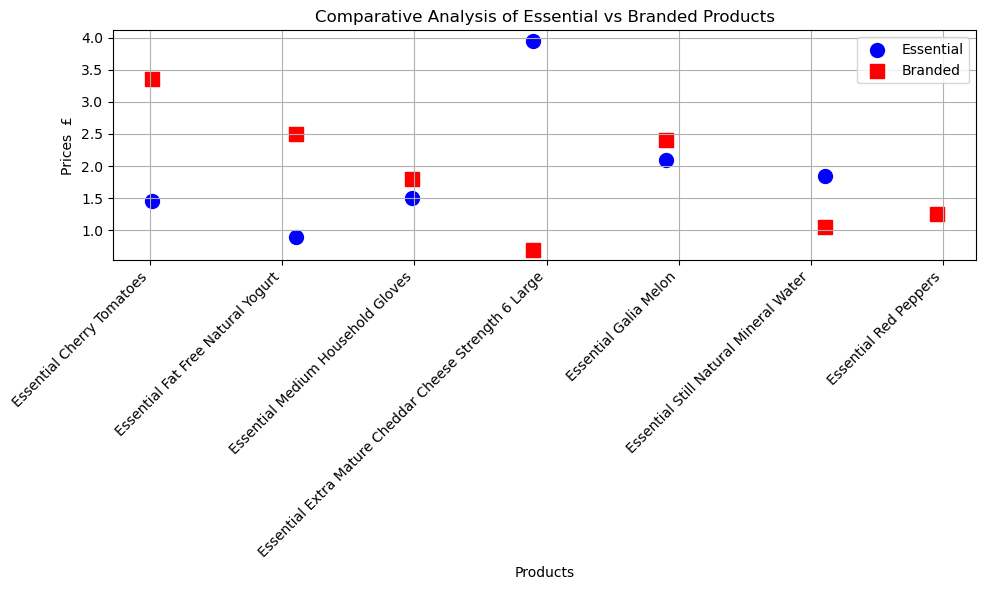

In [58]:
number_of_samples = 7

essential_samples = random.sample(essential, number_of_samples)
branded_samples = random.sample(branded, number_of_samples)

essential_prices_sampled = []
for product in essential_samples:
    index = essential.index(product)
    essential_prices_sampled.append(essential_prices[index])

branded_prices_sampled = []
for product in branded_samples:
    if product in branded:
        index = branded.index(product)
        branded_prices_sampled.append(branded_prices[index])
    else:
        # Handle cases where price is None or product not found
        branded_prices_sampled.append(0)  # Assuming 0 for simplicity, can be adjusted based on data availability

jitter = np.random.uniform(low=-0.2, high=0.2, size=len(essential_samples))

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(np.arange(len(essential_samples)) + jitter, essential_prices_sampled, color='b', label='Essential', marker='o', s=100)

ax.scatter(np.arange(len(branded_samples)) + jitter, branded_prices_sampled, color='r', label='Branded', marker='s', s=100)

ax.set_xlabel('Products')
ax.set_ylabel('Prices  £')
ax.set_title('Comparative Analysis of Essential vs Branded Products')
ax.set_xticks(np.arange(len(essential_samples)))
ax.set_xticklabels(essential_samples, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.grid(True)
plt.show()
